# The 6.3 Magnitude L'Aquila Earthquake on April 6, 2009 in Central Italy

The L'Aquila earthquake on April 6, 2009 in central Italy killed over 300 people and was one of the worst earthquakes in the country in 30 years. However, this earthquake is more well known for the controversy surrounding it. Six scientists and one government official on the Italian National Commission for the Forecast and Prevention of Major Risks were accused of giving "inexact, incomplete and contradictory" information about the earthquake danger before the mainshock. These 7 people were convicted of manslaughter for downplaying the likelihood of a major earthquake six days before it took place, although the conviction was overturned upon appeal.

![image](https://upload.wikimedia.org/wikipedia/commons/e/e2/20090406_013242_umbria_quake_intensity.jpg)

_This notebook will plot the earthquakes before the magnitude 6.3 mainshock on April 6, 2009 to see whether there was an unusual pattern in the days leading up to the mainshock._

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
client = Client("IRIS")

## Search Parameters

The next code block will set the variables for our earthquake catalog search.

In [3]:
startt = UTCDateTime("1999-04-06")
endt = UTCDateTime("2009-04-06")
maxrad = 1.0
minmag = 2.0
lat = 42.3476
lon = 13.3800

## Request Data

The next code block will request the earthquake data from the IRIS catalog and assign it to a variable. 
This can take a few minutes to complete if the number of events being requested is large.

In [4]:
cat = client.get_events(starttime=startt, endtime=endt, latitude=lat, longitude=lon, maxradius=maxrad, minmagnitude=minmag, catalog="ISC")

## Massage the Data

The data returned from the catalog needs to be changed in order to be useful to our needs. The next code block will loop over each event, and copy the times and magnitudes of the returned events into their respective lists.

In [5]:
times = []
mags = []
for event in cat:
    times.append(event.origins[0].time.datetime)
    mags.append(event.magnitudes[0].mag)

# Reformat the times for Matlab
mtimes = mdates.date2num(times)

## Plot the Data

The next code block generates a figure of a plot that shows the magnitude of all earthquakes in the catalog over time.

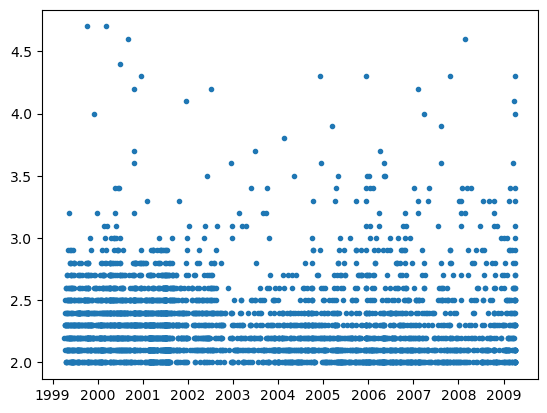

In [6]:
fig1 = plt.subplots(1,1)

plt.plot_date(mtimes,mags,'.')
plt.show()

In the weeks leading up to the April 6th earthquake, there was no unusual seismic activity in the area to indicate a high magnitude earthquake was impending.

To be thorough, we will also investigate the seismic activity closer to the event. The next code block will generate a figure of a histogram of the days preceding seismic events.

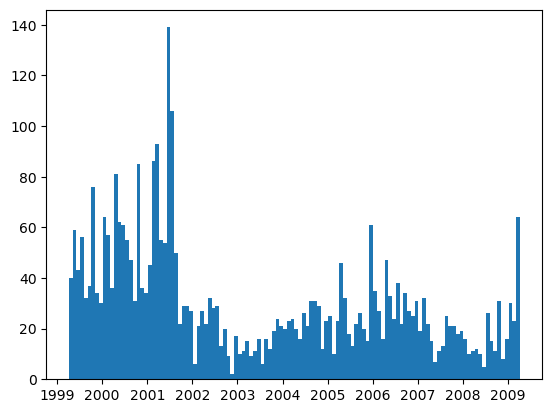

In [7]:
fig2, axes = plt.subplots(1,1)

axes.hist(mtimes, bins=120)
axes.xaxis.set_major_locator(mdates.YearLocator())
axes.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.show()

In the days leading up to the April 6th earthquake, the seismicity rate was moderately high, but it has been much higher in the past 10 years without producing an earthquake greater than magnitude 6.